In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)




In [2]:
data = pd.read_csv(r"C:\Users\hamir\Desktop\Wind Turbine\data\T1.csv")

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [4]:
data.shape

(50530, 5)

In [5]:
data.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [6]:
data.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

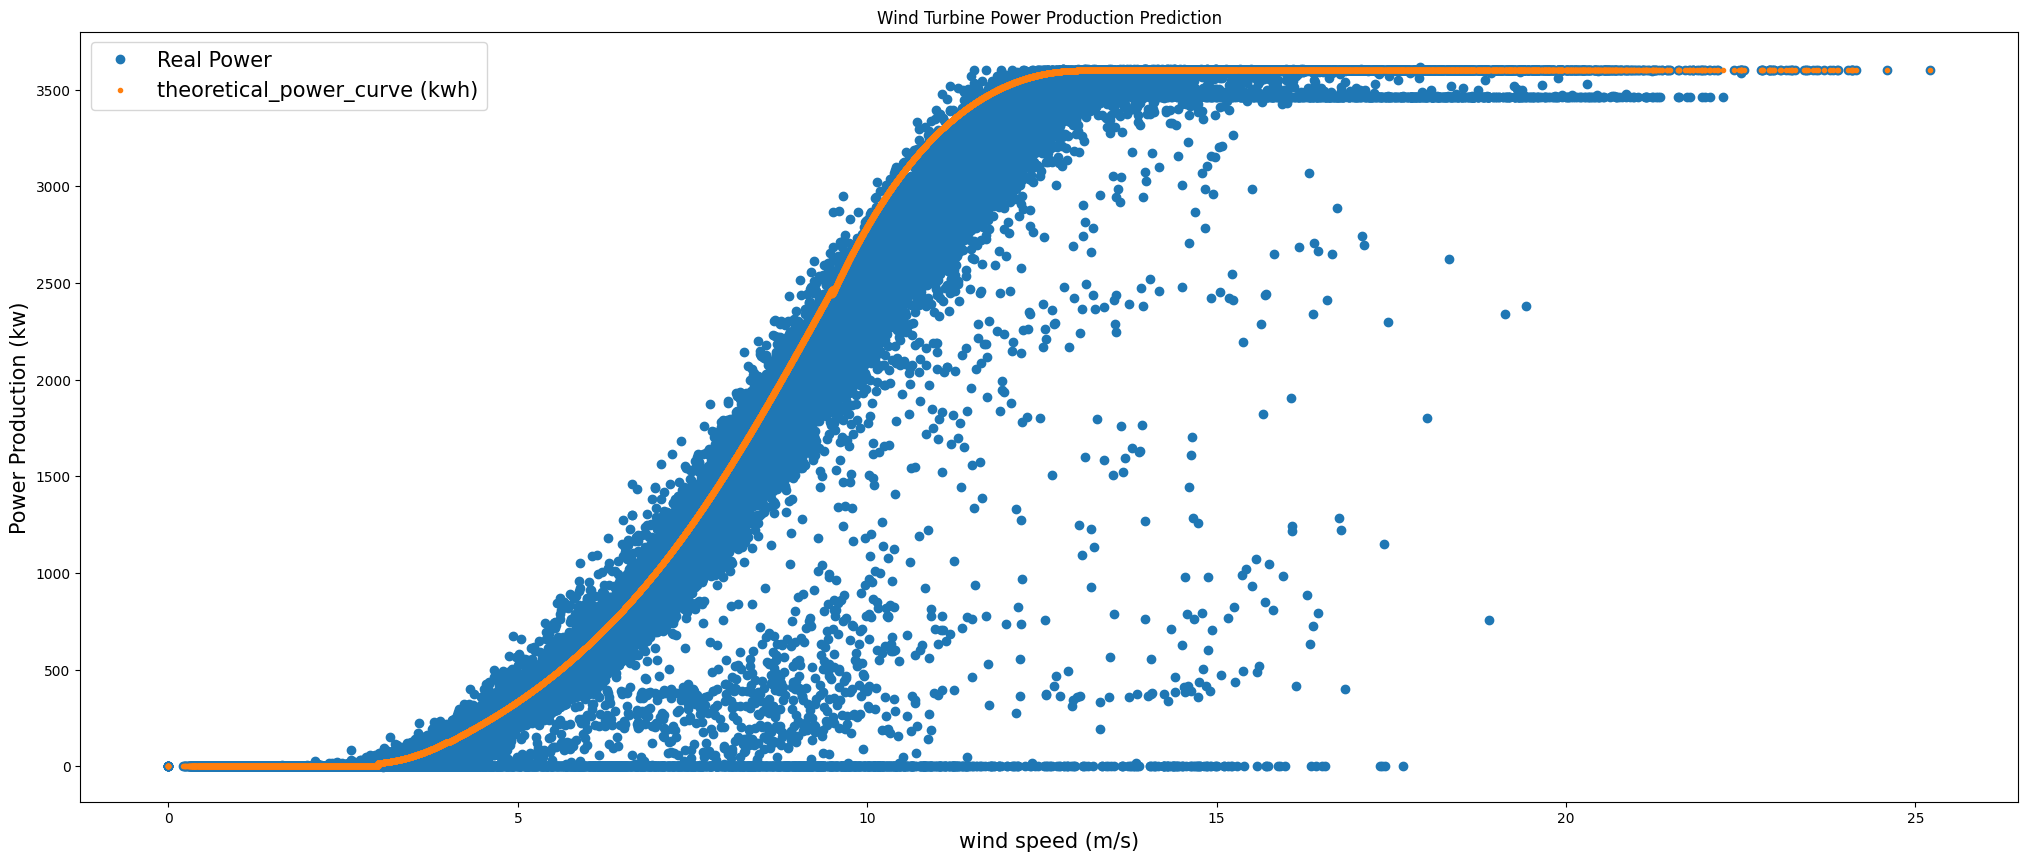

In [7]:
data = data
exp = data['LV ActivePower (kW)']
the = data['Theoretical_Power_Curve (KWh)']
plt.figure(figsize=(25,10)) 
plt.plot(data['Wind Speed (m/s)'], data['LV ActivePower (kW)'], 'o', label='Real Power')
plt.plot(data['Wind Speed (m/s)'], data['Theoretical_Power_Curve (KWh)'], '.', label='theoretical_power_curve (kwh)')
plt.xlabel('wind speed (m/s)', size=15)
plt.ylabel('Power Production (kw)', size=15)
plt.title('Wind Turbine Power Production Prediction')
plt.legend(fontsize=15)
plt.show()

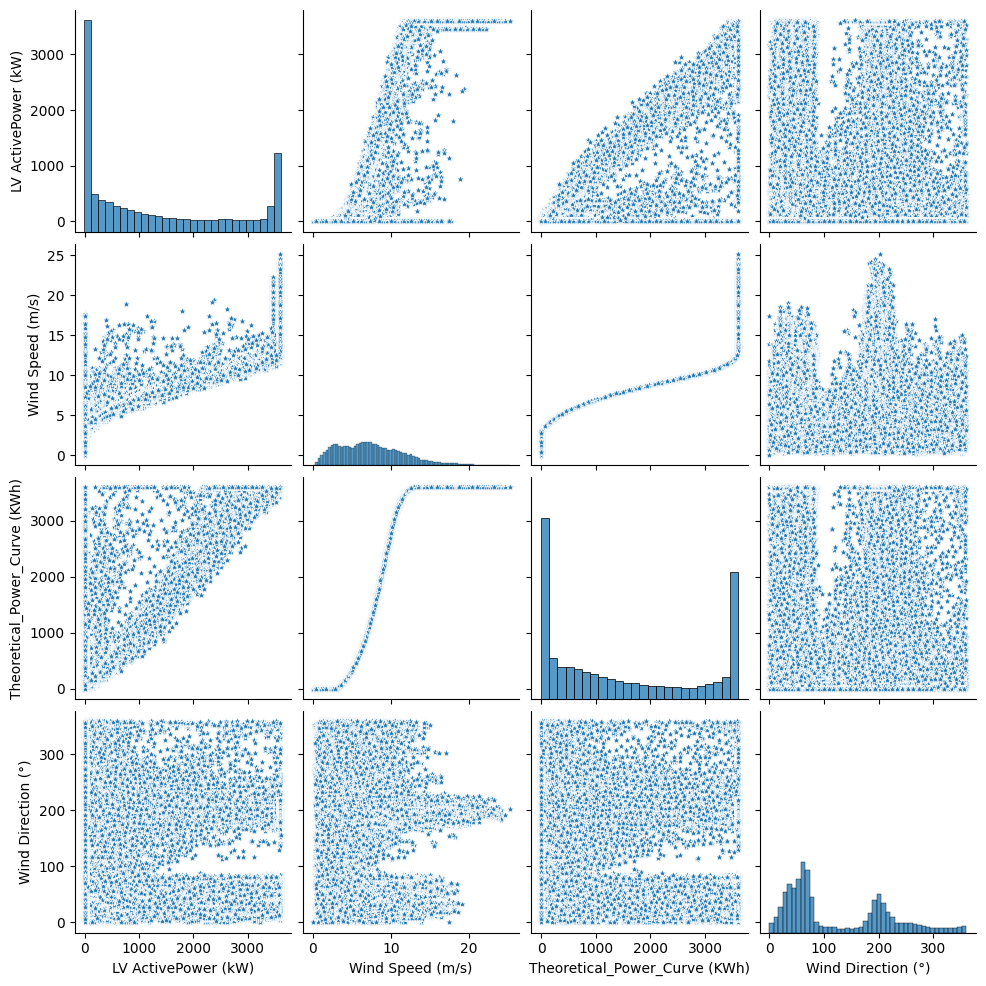

In [8]:
import seaborn as sns
sns.pairplot(data, markers='*')

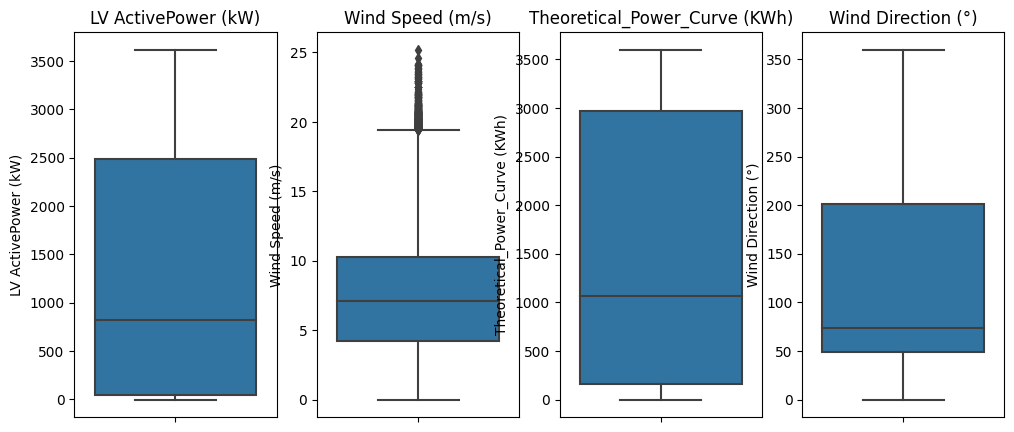

In [10]:
import matplotlib.pyplot as plt
columns = ['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']
i=1
plt.figure(figsize=(12,5))
for each in columns:
    plt.subplot(1,4,i)
    sns.boxplot(data = data, y= each)
    plt.title(each)
    i += 1

In [11]:

from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [12]:
def outlier_remover(dat, prop, min, max):
    d = dat
    q_low = d[prop].quantile(min)
    q_hi  = d[prop].quantile(max)
    return d[(d[prop] < q_hi) & (d[prop] > q_low)]

Now, create multi-DataFrames 

In [13]:
# Create Sub-DataFrames
d = {}
step = 50
i = 1
for x in range(20, 3400, step):
    d[i] = data.iloc[((data['LV ActivePower (kW)']>=x)&((data['LV ActivePower (kW)']<x+step))).values]
    #print(d[i])
    i = i + 1
print("There are in total of {} DataFrames".format(i-1))

There are in total of 68 DataFrames


In [14]:
d[69] = data.iloc[(data['LV ActivePower (kW)']>=3300).values]

Remove all outliers

In [15]:
# Remove outlier
for x in range(1, 70):
    if x <= 3:
        F = 0.95
    elif ((x > 3) and (x <= 10)):
        F = 0.9
    elif ((x > 10) and (x <= 20)):
        F = 0.92
    elif ((x > 20) and (x < 30)):
        F = 0.96
    else:
        F = 0.985
    d[x] = outlier_remover(d[x], 'Wind Speed (m/s)', 0.0001, F)

Re-joint the DataFrames

In [22]:
df=pd.DataFrame()
for infile in range(1,70):
    data = d[infile]
    #df=df.append(data,ignore_index=True)
    df = pd.concat(d.values(), ignore_index=True)


In [23]:
df.shape

(37803, 5)

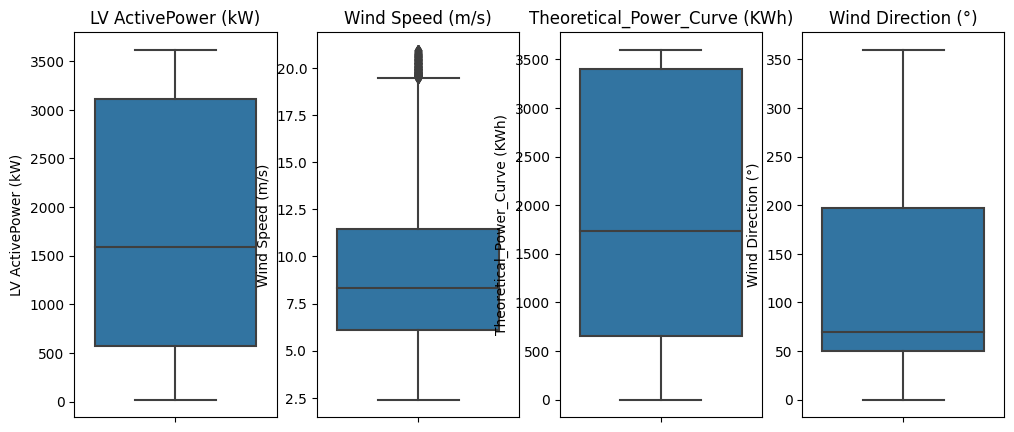

In [24]:
import matplotlib.pyplot as plt
columns = ['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']
i=1
plt.figure(figsize=(12,5))
for each in columns:
    plt.subplot(1,4,i)
    sns.boxplot(data = df, y= each)
    plt.title(each)
    i += 1

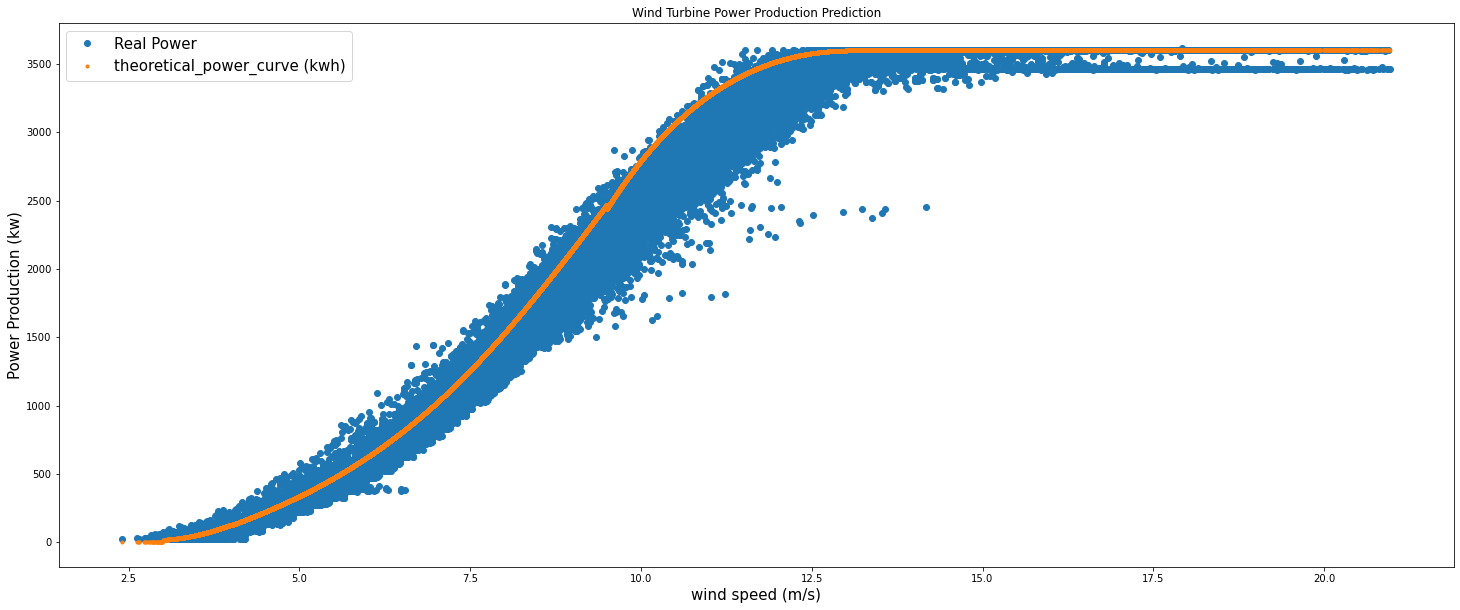

In [16]:
data = df
exp = data['LV ActivePower (kW)']
the = data['Theoretical_Power_Curve (KWh)']
plt.figure(figsize=(25,10)) 
plt.plot(data['Wind Speed (m/s)'], data['LV ActivePower (kW)'], 'o', label='Real Power')
plt.plot(data['Wind Speed (m/s)'], data['Theoretical_Power_Curve (KWh)'], '.', label='theoretical_power_curve (kwh)')
plt.xlabel('wind speed (m/s)', size=15)
plt.ylabel('Power Production (kw)', size=15)
plt.title('Wind Turbine Power Production Prediction')
plt.legend(fontsize=15)
plt.show()

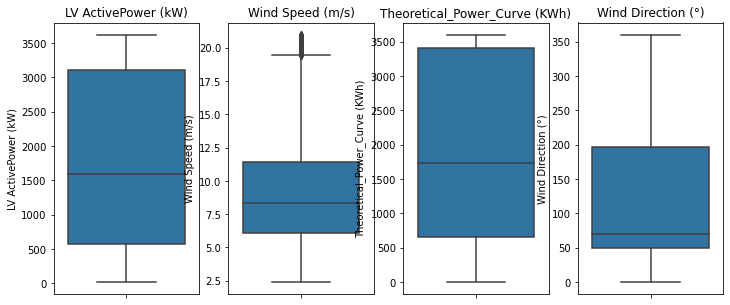

In [17]:
import matplotlib.pyplot as plt
columns = ['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']
i=1
plt.figure(figsize=(12,5))
for each in columns:
    plt.subplot(1,4,i)
    sns.boxplot(data = df, y= each)
    plt.title(each)
    i += 1

In [25]:
ftrain = ['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Wind Direction (°)']

def Definedata():
    # define dataset
    data2 = df[ftrain]
    X = data2.drop(columns=['LV ActivePower (kW)']).values
    y = data2['LV ActivePower (kW)'].values
    #lab_enc = preprocessing.LabelEncoder()
    #y = lab_enc.fit_transform(y0)
    return X, y

In [26]:
def Models(models):
    
    model = models
    X, y = Definedata()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)
    model.fit(X_train,y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_total = model.predict(X)
    
    print("\t\tError Table")
    print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred_test))
    print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred_test))
    print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
    print('Accuracy on Traing set   : ', metrics.r2_score(y_train,y_pred_train))
    print('Accuracy on Testing set  : ', metrics.r2_score(y_test,y_pred_test))
    return y_total, y

def Featureimportances(models):
    model = models
    model.fit(X_train,y_train)
    importances = model.feature_importances_
    features = df_test.columns[:9]
    imp = pd.DataFrame({'Features': ftest, 'Importance': importances})
    imp['Sum Importance'] = imp['Importance'].cumsum()
    imp = imp.sort_values(by = 'Importance')
    return imp

def Graph_prediction(y_actual, y_predicted):
    y = y_actual
    y_total = y_predicted
    TP = df['Theoretical_Power_Curve (KWh)']
    number = len(df['Wind Speed (m/s)'])
    aa=[x for x in df['Wind Speed (m/s)']]
    plt.figure(figsize=(25,10)) 
    plt.plot(aa, y[:number], 'o', label='Real Power')
    plt.plot(aa, y_total[:number], 'x', label='Predicted Power')
    plt.plot(aa, TP[:number], '.', label='theoretical_power_curve (kwh)')
    
    plt.xlabel('wind speed (m/s)', size=15)
    plt.ylabel('Power Production (kw)', size=15)
    plt.title('Wind Turbine Power Production Prediction')
    plt.legend(fontsize=15)
    plt.show()

		Error Table
Mean Absolute Error      :  86.2019481851275
Mean Squared  Error      :  16287.624255027184
Root Mean Squared  Error :  127.62297698701117
Accuracy on Traing set   :  0.9937399430256927
Accuracy on Testing set  :  0.9896820050171048


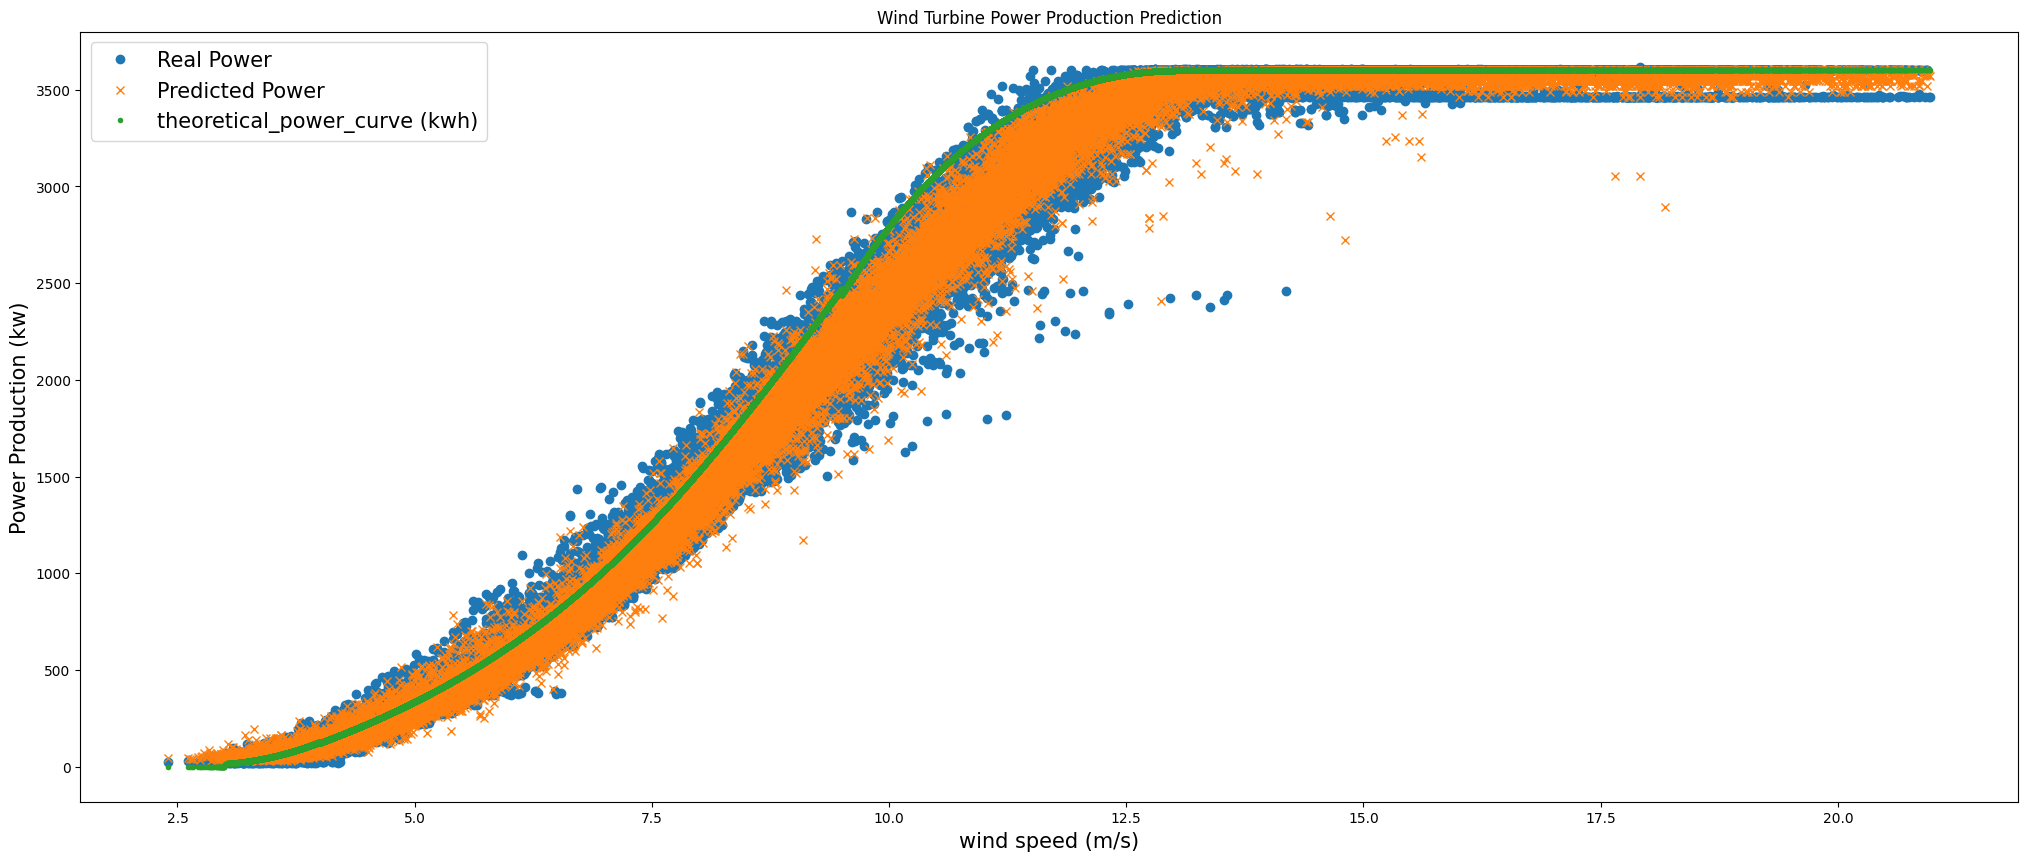

In [27]:
y_predicted, y_actual = Models(KNeighborsRegressor())
Graph_prediction(y_actual, y_predicted)

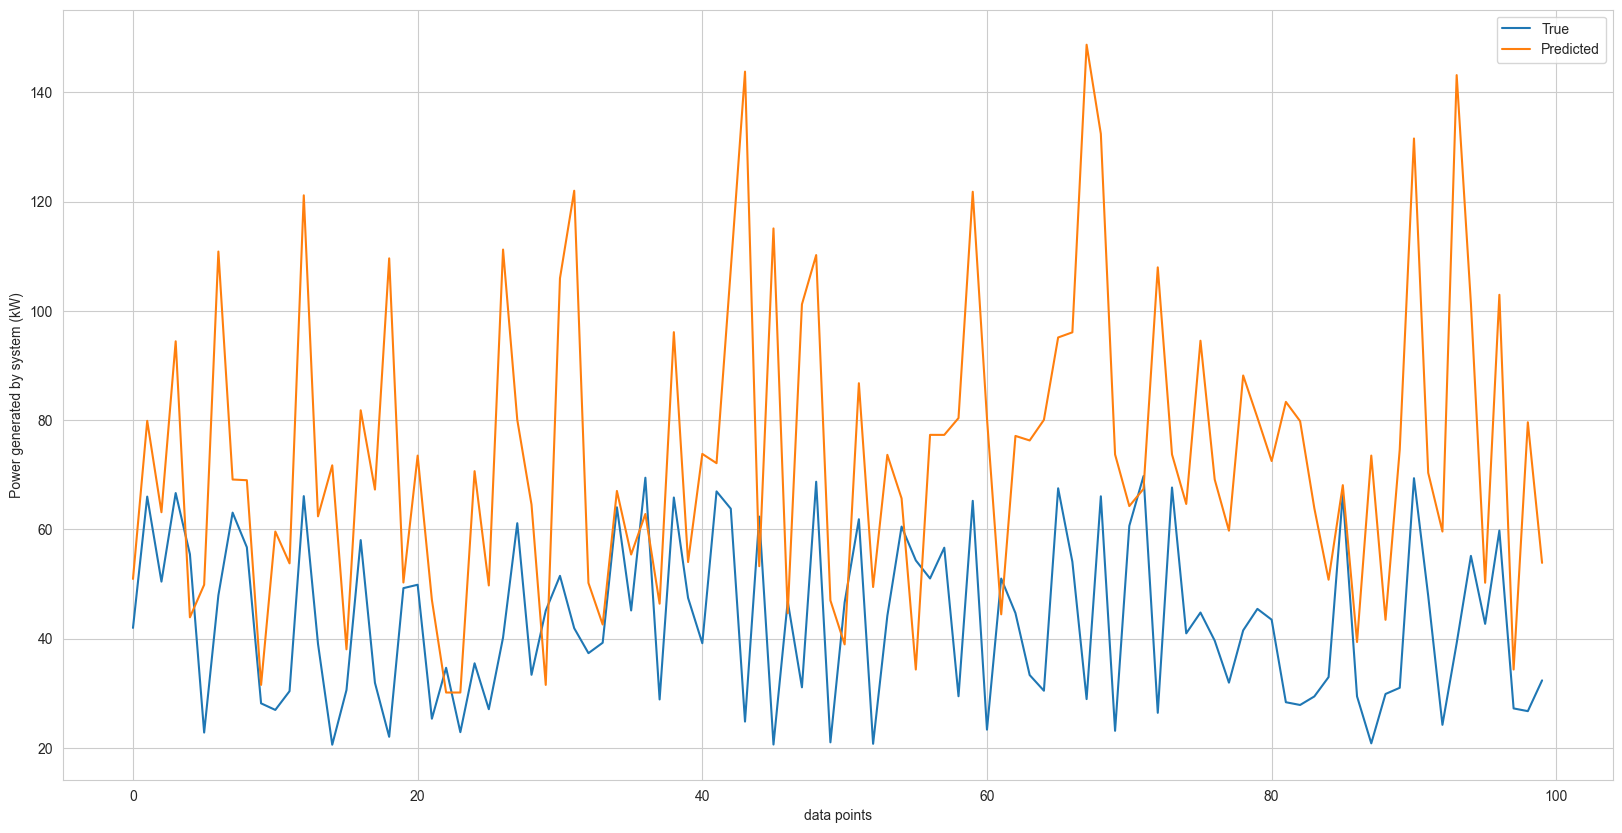

In [28]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.plot(y_actual[0:100], label="True")
plt.plot(y_predicted[0:100], label="Predicted")
plt.legend(loc='upper right')
plt.xlabel("data points")
plt.ylabel("Power generated by system (kW)")
plt.show()

		Error Table
Mean Absolute Error      :  97.98595466307978
Mean Squared  Error      :  22731.024525845405
Root Mean Squared  Error :  150.76811508354612
Accuracy on Traing set   :  1.0
Accuracy on Testing set  :  0.9856001959928963


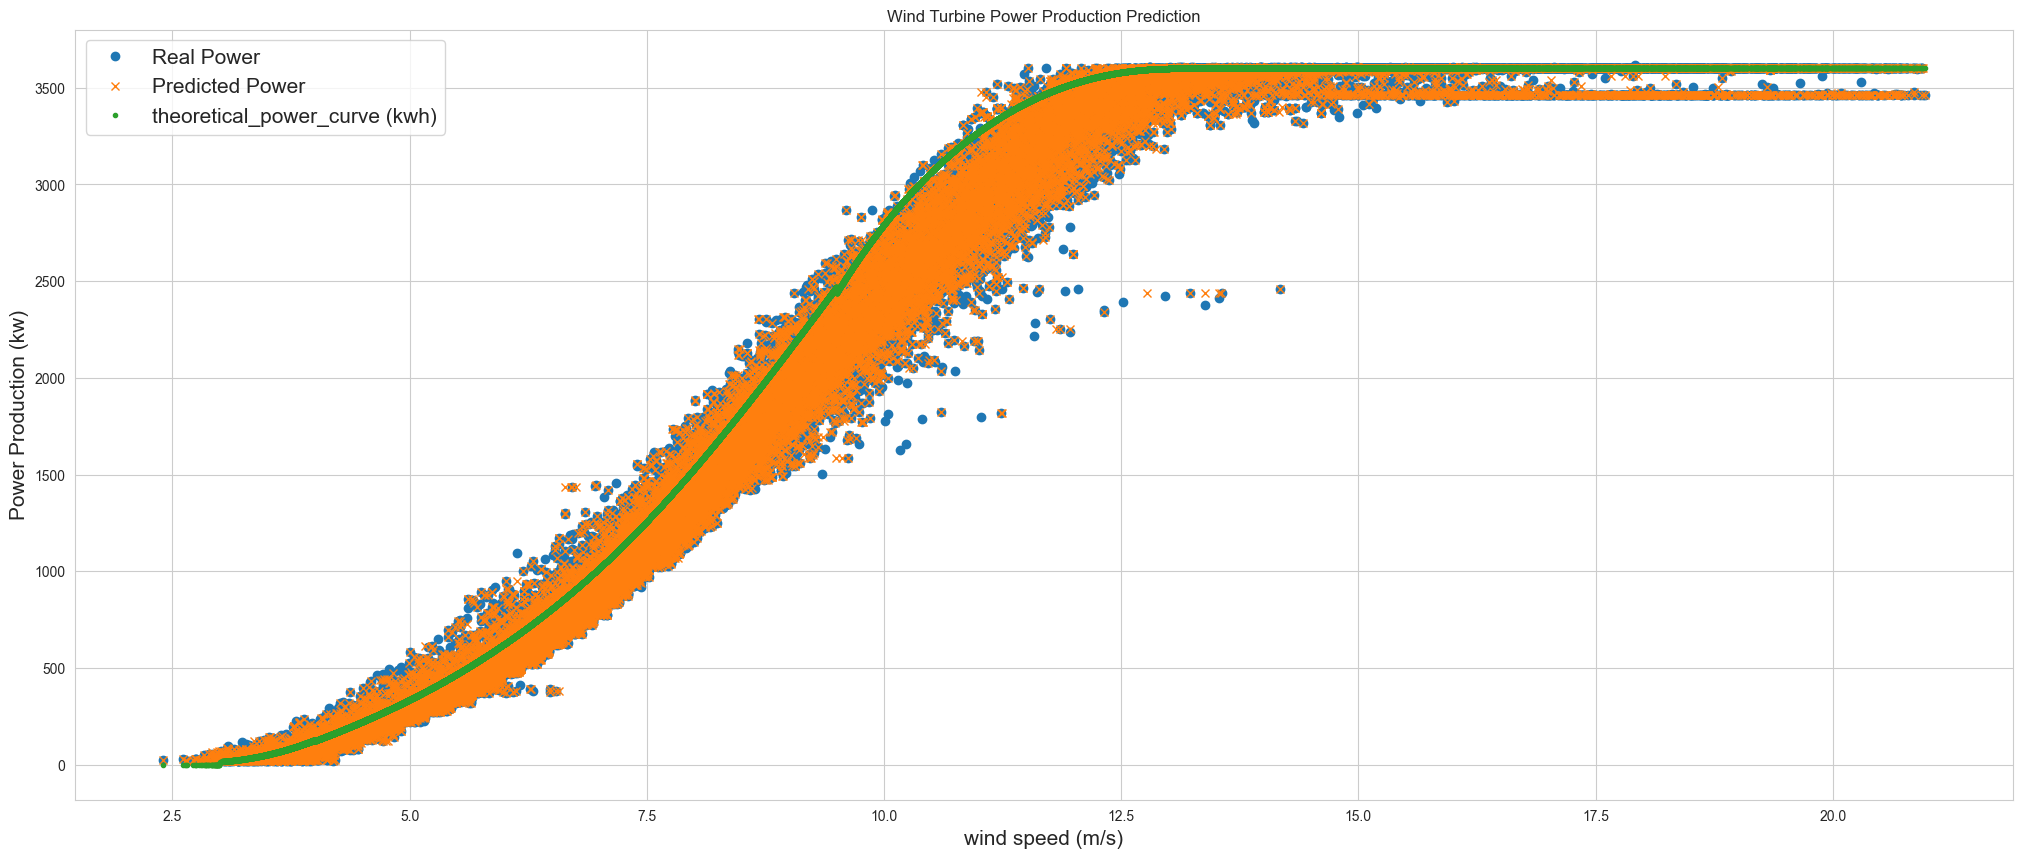

In [29]:
y_predicted, y_actual = Models(DecisionTreeRegressor())
Graph_prediction(y_actual, y_predicted)

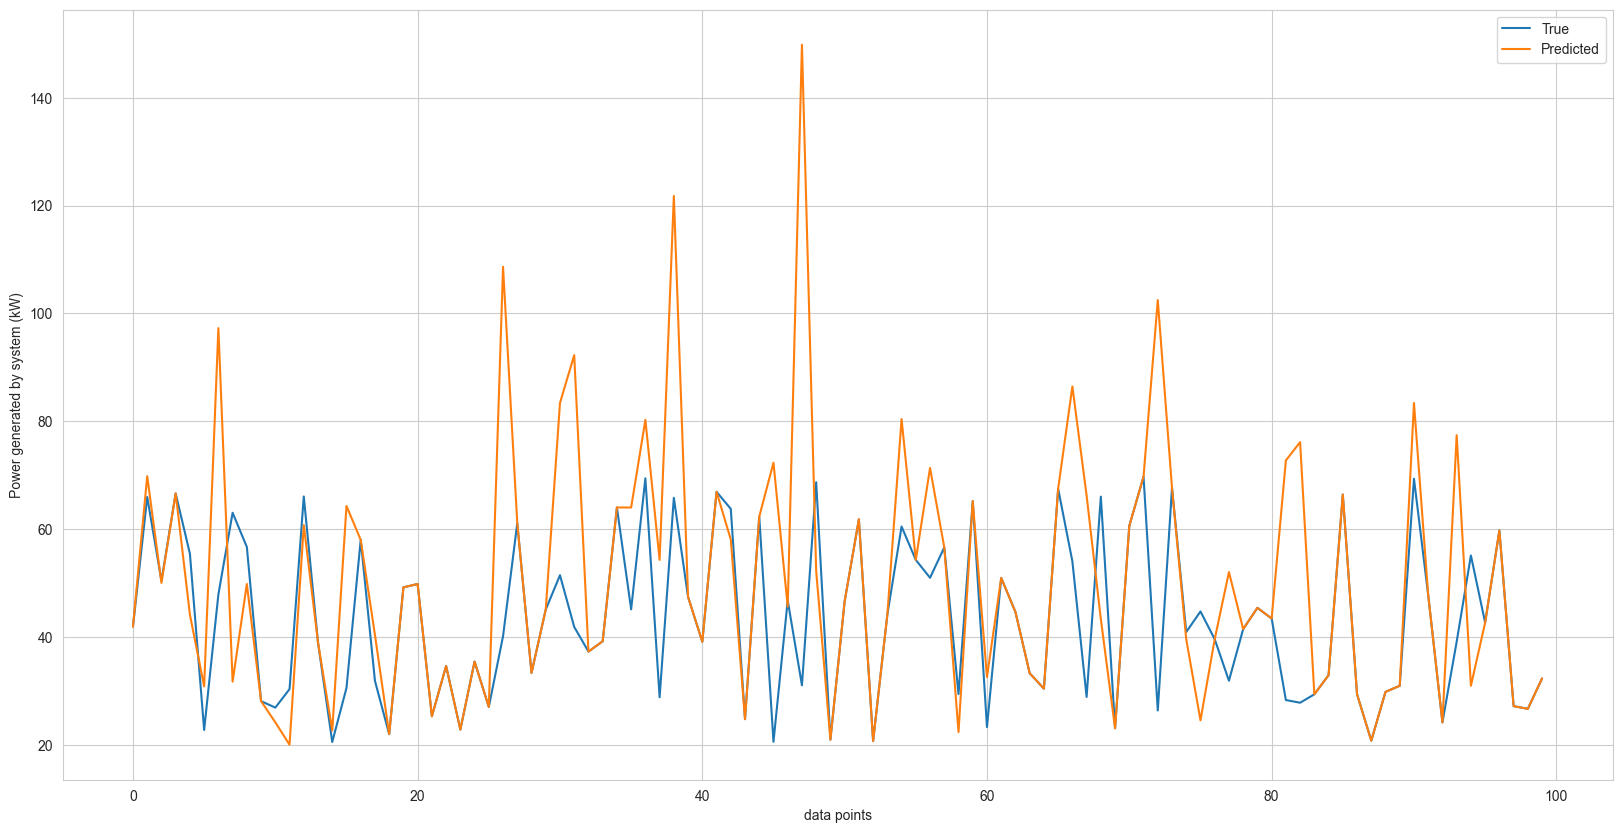

In [30]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.plot(y_actual[0:100], label="True")
plt.plot(y_predicted[0:100], label="Predicted")
plt.legend(loc='upper right')
plt.xlabel("data points")
plt.ylabel("Power generated by system (kW)")
plt.show()

		Error Table
Mean Absolute Error      :  79.95013266208011
Mean Squared  Error      :  14867.022449388898
Root Mean Squared  Error :  121.93040002144214
Accuracy on Traing set   :  1.0
Accuracy on Testing set  :  0.9905819375102518


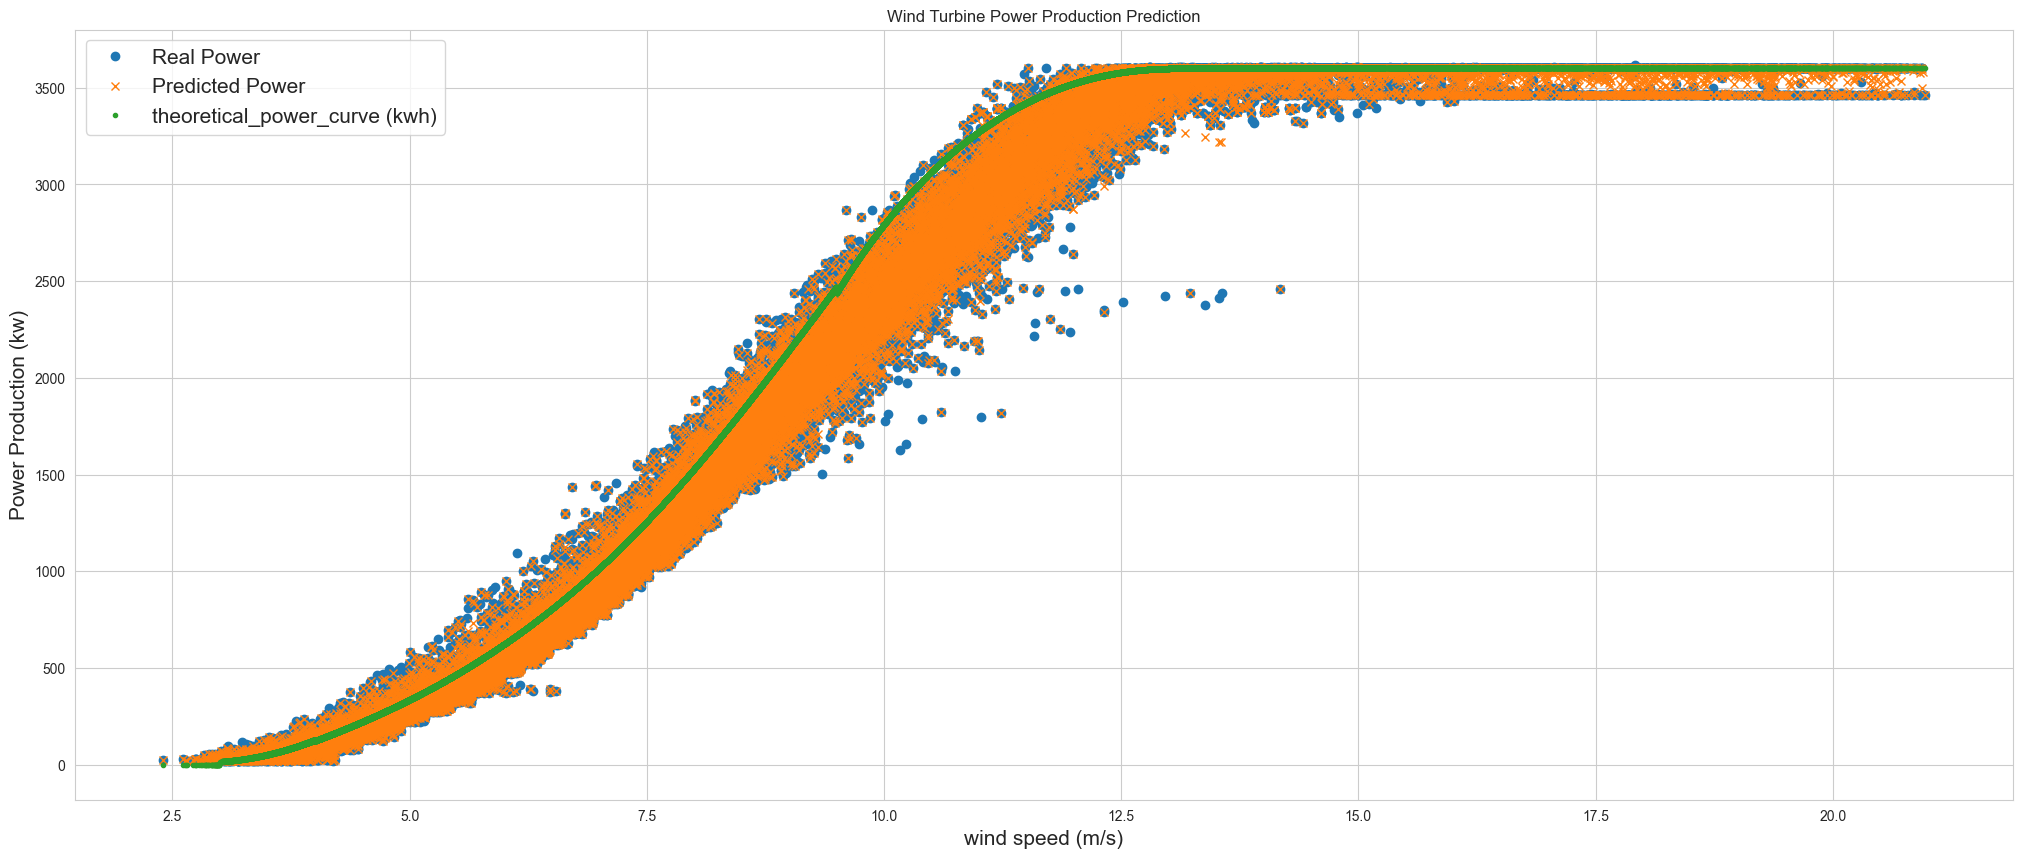

In [31]:
y_predicted, y_actual = Models(ExtraTreesRegressor())
Graph_prediction(y_actual, y_predicted)

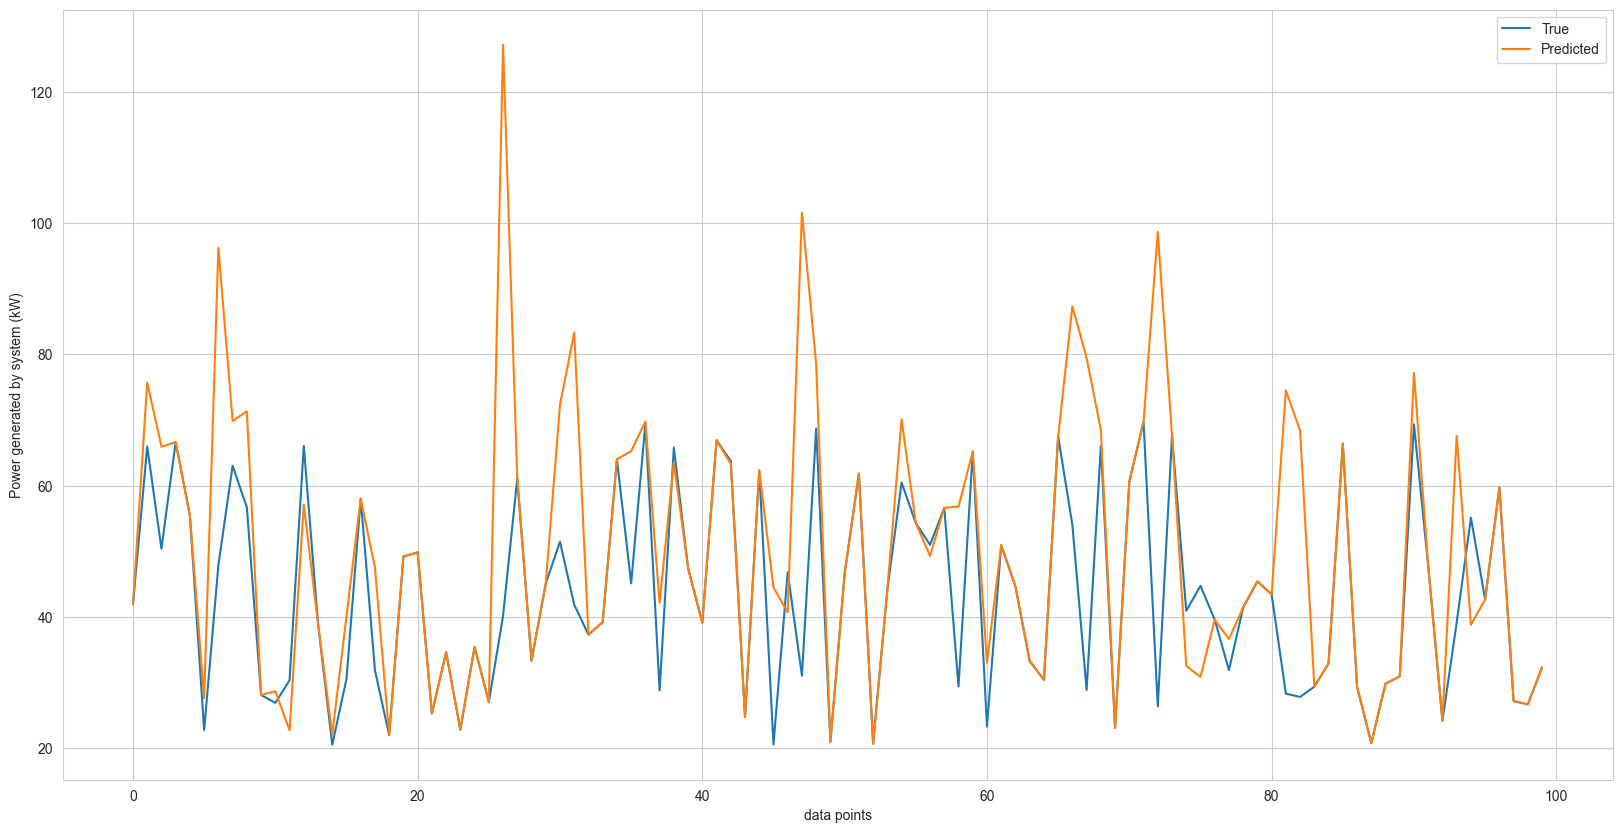

In [32]:
# line plot of observed vs predicted
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.plot(y_actual[0:100], label="True")
plt.plot(y_predicted[0:100], label="Predicted")
plt.legend(loc='upper right')
plt.xlabel("data points")
plt.ylabel("Power generated by system (kW)")
plt.show()

		Error Table
Mean Absolute Error      :  76.90956458466434
Mean Squared  Error      :  13487.331792488556
Root Mean Squared  Error :  116.13497230588449
Accuracy on Traing set   :  0.9989264234625762
Accuracy on Testing set  :  0.9914559533306654


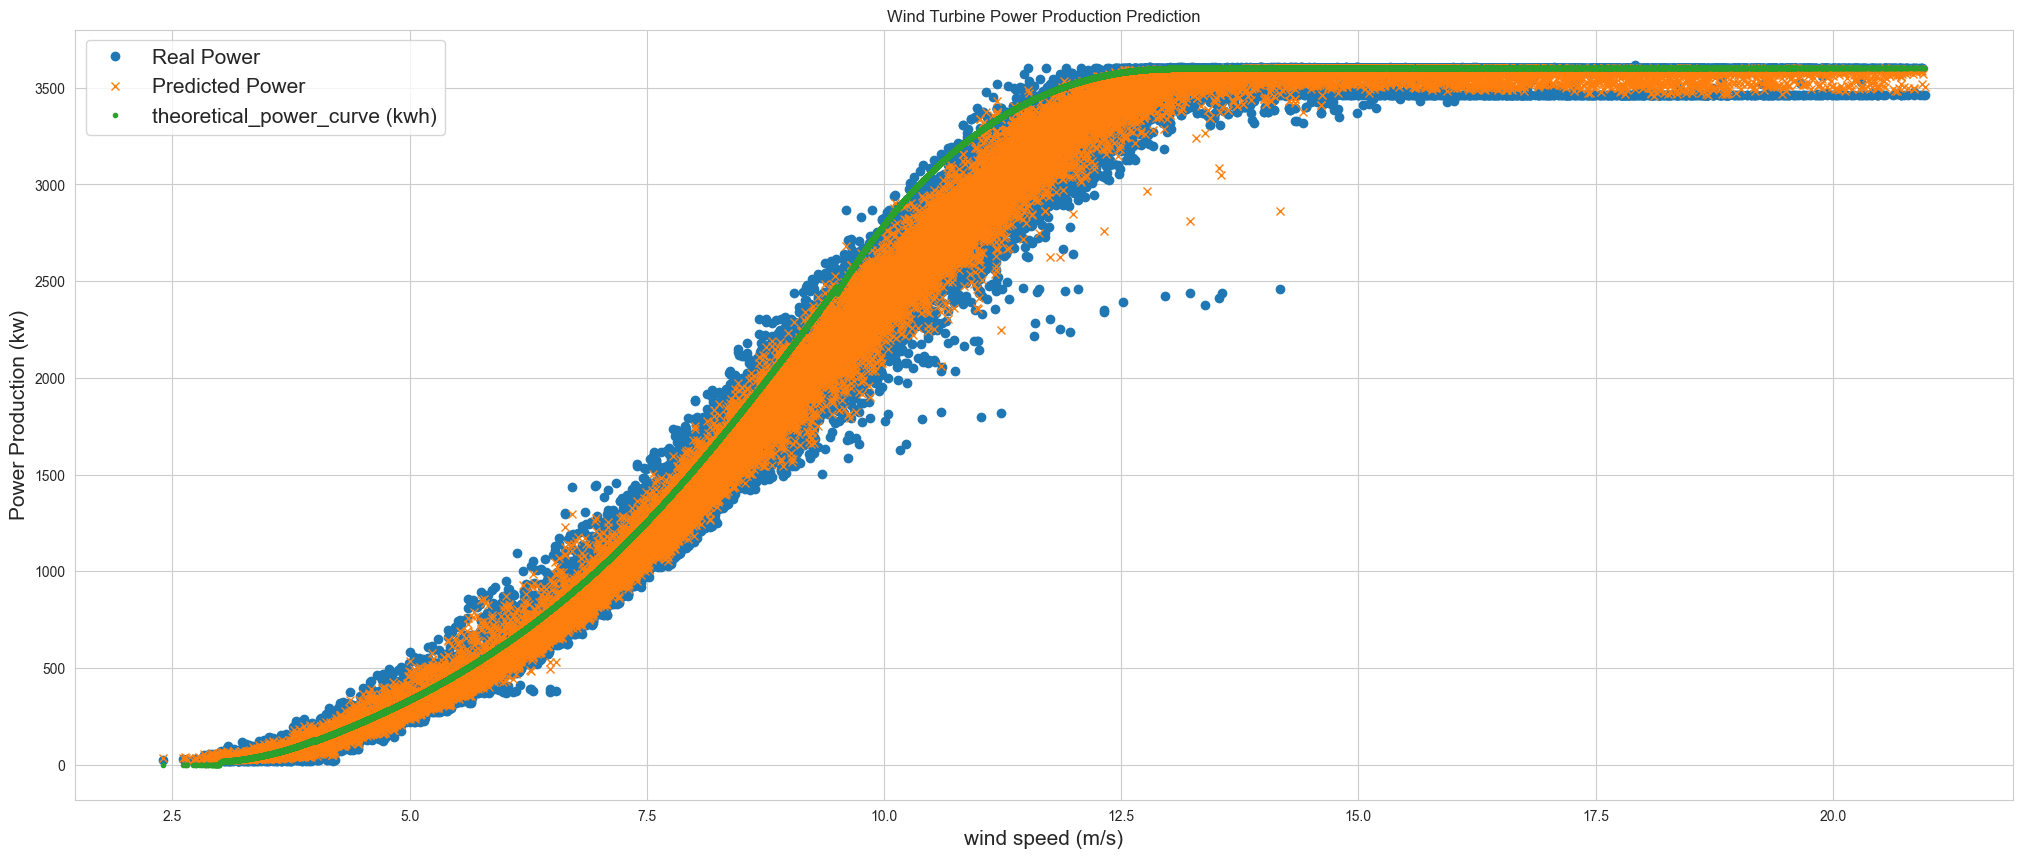

In [33]:
y_predicted, y_actual = Models(RandomForestRegressor(n_estimators=350,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=25))
Graph_prediction(y_actual, y_predicted)

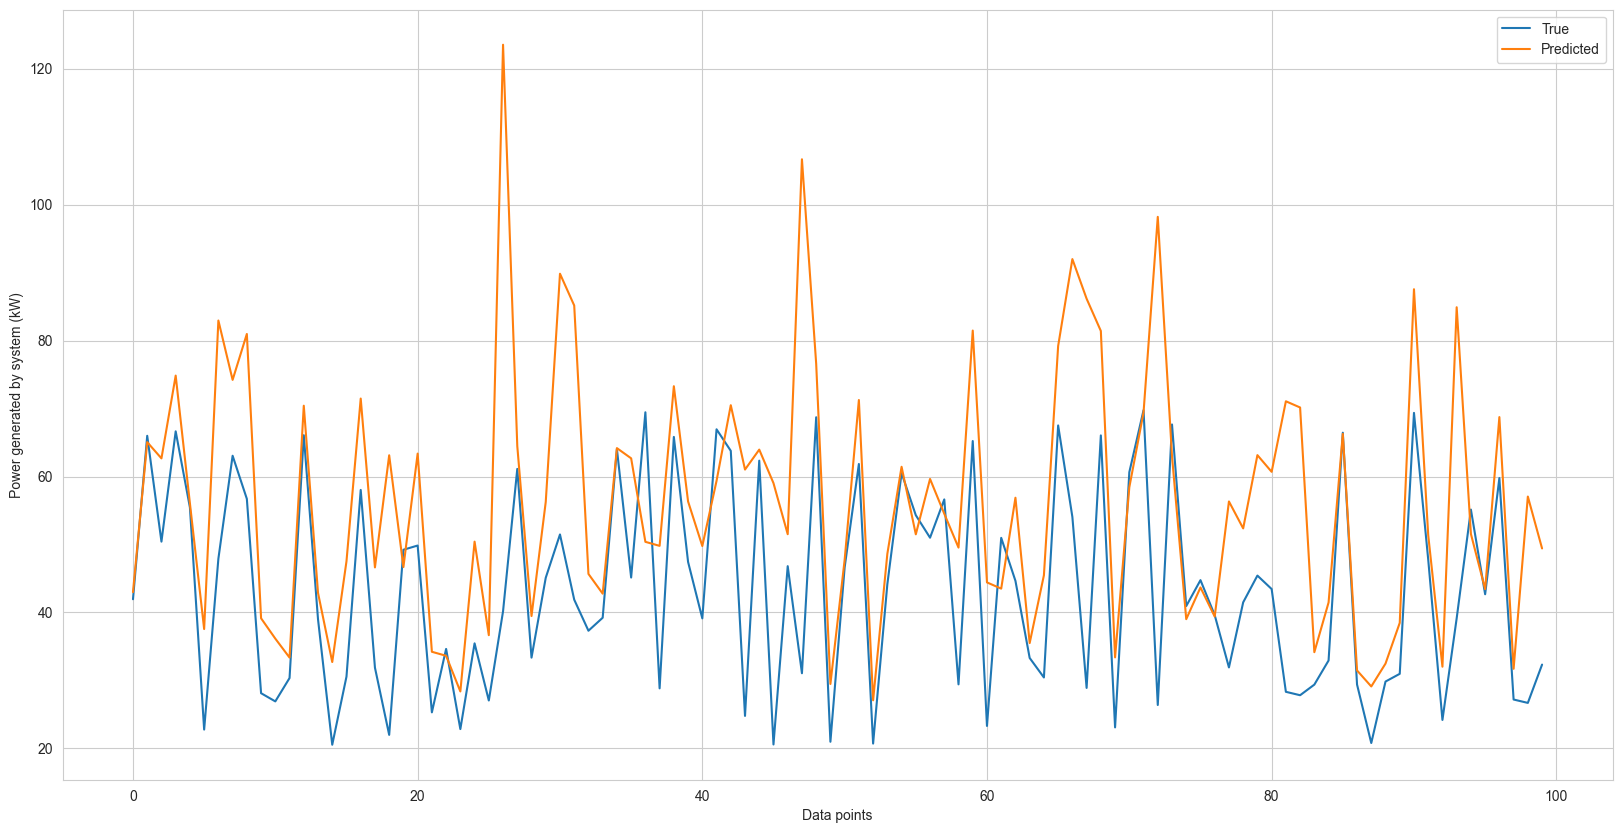

In [34]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.plot(y_actual[0:100], label="True")
plt.plot(y_predicted[0:100], label="Predicted")
plt.legend(loc='upper right')
plt.xlabel("Data points")
plt.ylabel("Power generated by system (kW)")
plt.show()

		Error Table
Mean Absolute Error      :  76.73995111763604
Mean Squared  Error      :  13168.264871568525
Root Mean Squared  Error :  114.75306040175366
Accuracy on Traing set   :  0.995230570335858
Accuracy on Testing set  :  0.9916580780136586


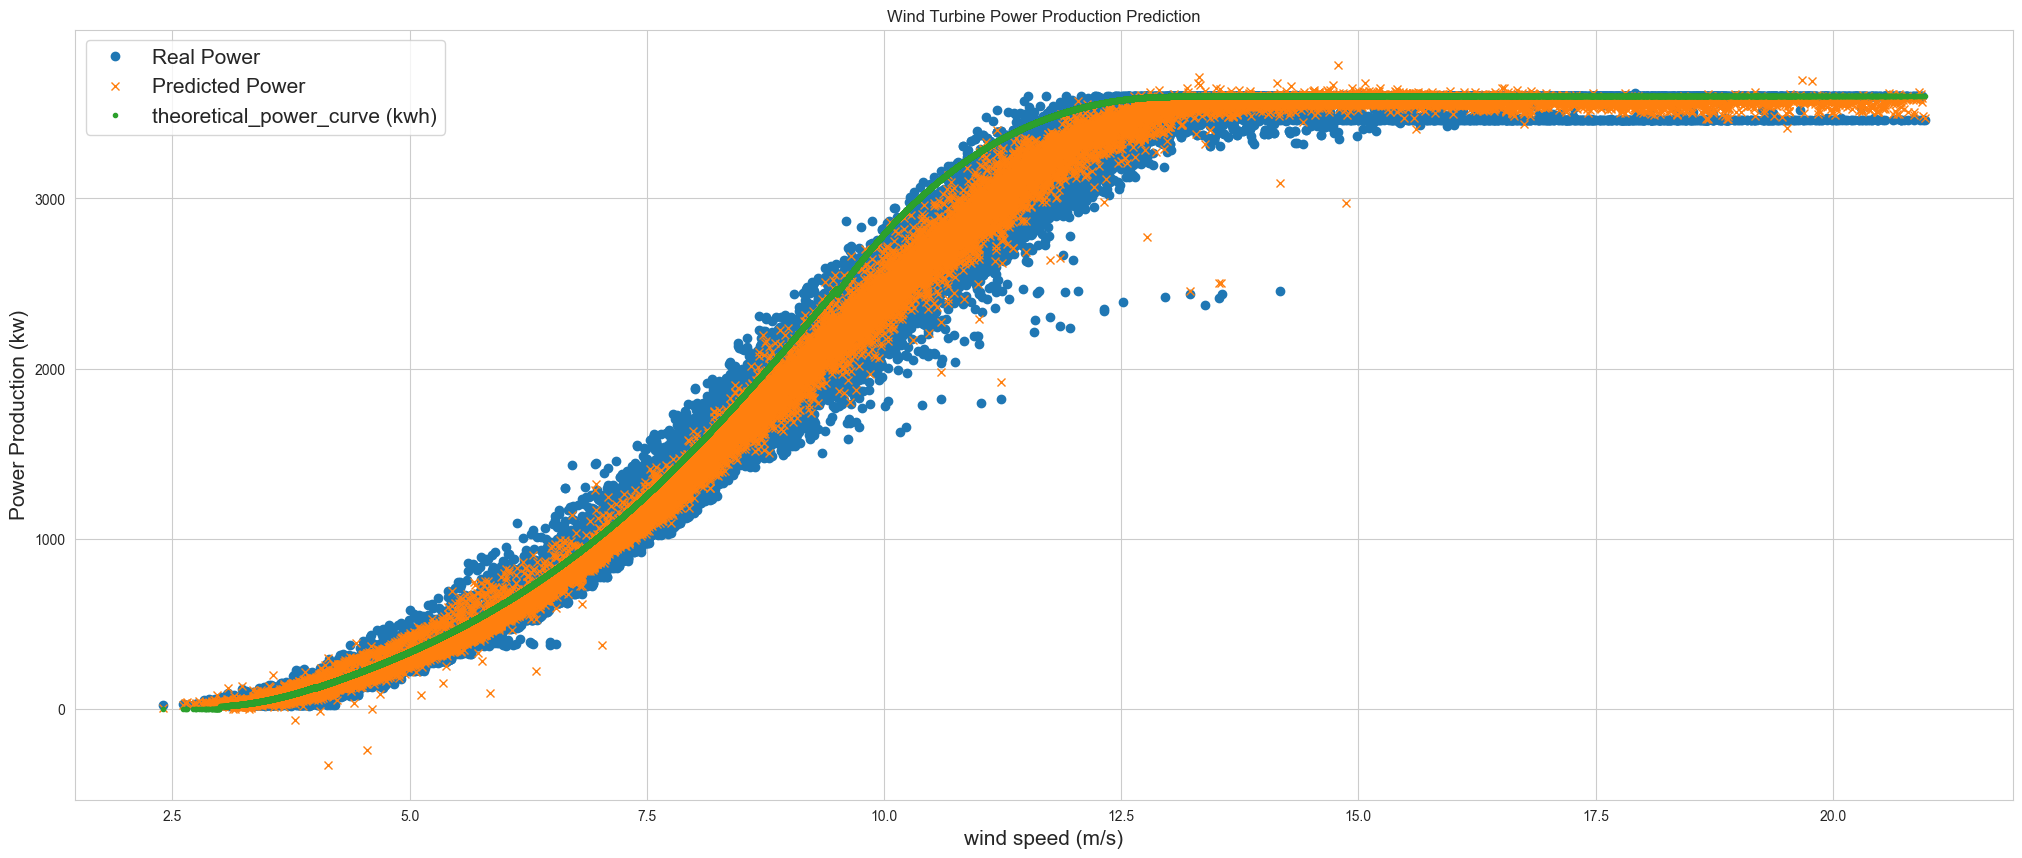

In [35]:
y_predicted, y_actual = Models(GradientBoostingRegressor(random_state=21, n_estimators=2000))
Graph_prediction(y_actual, y_predicted)

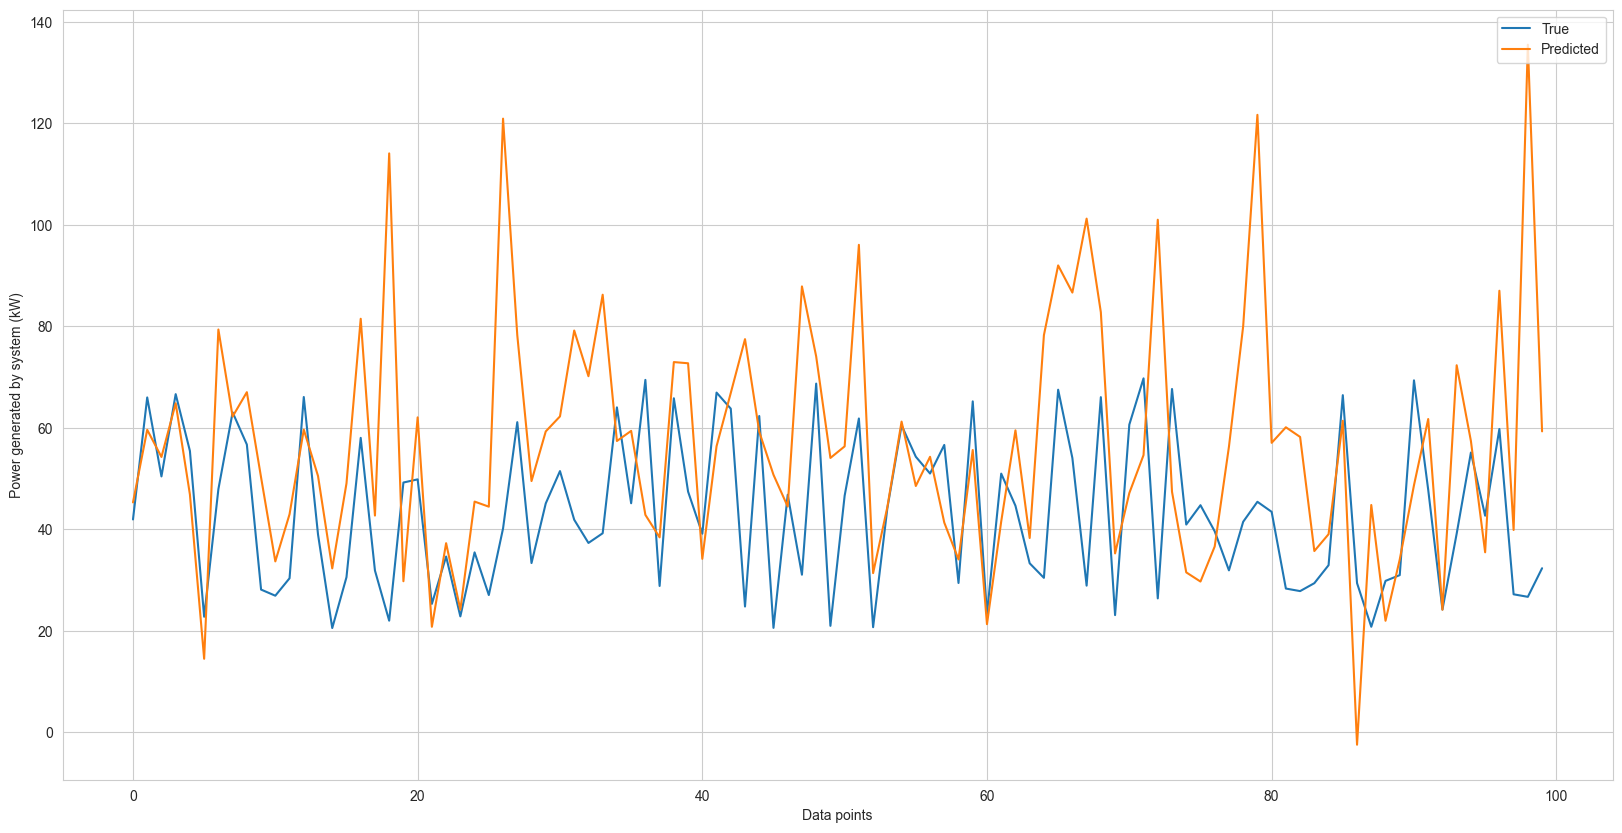

In [36]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.plot(y_actual[0:100], label="True")
plt.plot(y_predicted[0:100], label="Predicted")
plt.legend(loc='upper right')
plt.xlabel("Data points")
plt.ylabel("Power generated by system (kW)")
plt.show()